## Redfin Web Scraping Project

### Import libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
from time import sleep
import smtplib
import random

In [2]:
## Import Selenium
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains

In [3]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [8]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get('https://www.redfin.ca/bc/vancouver')

C:\Users\markm\AppData\Local\Temp\ipykernel_16180\1989050257.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


### Navigating using Selenium

In [5]:
## Note: use this when the driver goes to default main page

In [6]:
search_bar = driver.find_element(By.XPATH,'//*[@id="search-box-input"]')

In [7]:
search_bar.send_keys('Vancouver, BC')

In [8]:
search_bar.send_keys(Keys.RETURN)

### Parsing with BeautifulSoup

In [9]:
#NOTE for scrolling down - run when necessary
#scrolling down
# driver.execute_script("window.scrollTo(0, window.scrollY + 250)")

#### Get Information about Properties in Greater Vancouver Area

In [ ]:
price_list = []

for price in soup.find_all('span', {'class': 'homecardV2Price'}):
    price_list.append(price.get_text())
price_list

In [ ]:
address_list = []

for address in soup.find_all('div', {'class': 'link-and-anchor'}):
    address_list.append(address.get_text())
address_list 

In [ ]:
home_stat = []

for stat in soup.find_all('div', {'class': 'HomeStatsV2 font-size-small'}):
    home_stat.append(stat.get_text())
home_stat

In [ ]:
## Looping to pages to get information about properties

In [3]:
## get number of pages each city name
## split by comma and strip the item in the listing
def get_number_of_pages(city_name):
    formatted_city_name = city_name.split(',')
    formatted_province = formatted_city_name[1].strip().lower()
    formatted_city = formatted_city_name[0].strip().lower()
    url = f'https://www.redfin.ca/{formatted_province}/{formatted_city}'
    header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'referer': 'https://www.redfin.ca/'
             }
    html = requests.get(url=url,headers=header)
    soup = BeautifulSoup(html.content, 'lxml')
    no_pages = int(soup.find('div', {'class': 'viewingPage'}).get_text().split()[4])
    return no_pages

In [4]:
#get page url
def get_page_url(city_name):
    formatted_city_name = city_name.split(',')
    formatted_province = formatted_city_name[1].strip().lower()
    formatted_city = formatted_city_name[0].strip().lower()
    url_list =[]
    for page_number in range(0, get_number_of_pages(city_name)+1):
        url = f'https://www.redfin.ca/{formatted_province}/{formatted_city}/page-{page_number}'
        header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
        'referer': 'https://www.redfin.ca/'
             }
        url_list.append(url)
    return url_list

In [5]:
get_number_of_pages('Vancouver, BC')
get_page_url('Vancouver, BC')[5]

'https://www.redfin.ca/bc/vancouver/page-5'

In [24]:
url = 'https://www.redfin.ca/bc/vancouver/'
driver.get(url)

result = requests.get(url)
soup = BeautifulSoup(result.content)

<!DOCTYPE html5>
<html><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<script src="https://www.google.com/recaptcha/api.js"></script>
<style type="text/css">

    #submit {
        -webkit-border-radius: 4;
        -moz-border-radius: 4;
        border-radius: 4px;
        font-family: Arial;
        font-size: 16px;
        background: #0c82a5;
        padding: 7px 10px 7px 10px;
        text-decoration: none;
        color: #ffffff;
        border: none;
    }

    #submit:hover {
        background: #3cb0fd;
        text-decoration: none;
    }

    body {
        font-family: Arial,"Helvetica Neue",Helvetica,sans-serif;
        margin: 0;
    }
    div#header {
        height: 59px;
        width: 100%;
        background-color: #fff;
        box-shadow: 0 0 1px rgba(0,0,0,.3);
    }

    div#error 
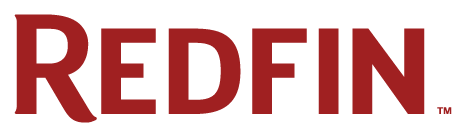

In [25]:
soup

<!DOCTYPE html5>
<html><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<script src="https://www.google.com/recaptcha/api.js"></script>
<style type="text/css">

    #submit {
        -webkit-border-radius: 4;
        -moz-border-radius: 4;
        border-radius: 4px;
        font-family: Arial;
        font-size: 16px;
        background: #0c82a5;
        padding: 7px 10px 7px 10px;
        text-decoration: none;
        color: #ffffff;
        border: none;
    }

    #submit:hover {
        background: #3cb0fd;
        text-decoration: none;
    }

    body {
        font-family: Arial,"Helvetica Neue",Helvetica,sans-serif;
        margin: 0;
    }
    div#header {
        height: 59px;
        width: 100%;
        background-color: #fff;
        box-shadow: 0 0 1px rgba(0,0,0,.3);
    }

    div#error 
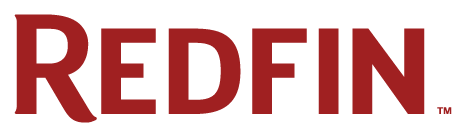

In [21]:
url = 'https://www.redfin.ca/bc/vancouver/page-5'
driver.get(url)

result = requests.get(url)
soup = BeautifulSoup(result.content)
listings = soup.find_all('div', {'class':'v2 interactive'})
data = {
            'price_list': [],
            'address': [],
            'home_stat': []
        }
for listing in listings:
    try:
        price_list = listing.find('span', {'class': 'homecardV2Price'}).get_text()
        address = listing.find('div', {'class': 'link-and-anchor'}).text
        home_stat = listing.find('div', {'class': 'HomeStatsV2 font-size-small'}).text
        data['price_list'].append(price_list)
        data['address'].append(address)
        data['home_stat'].append(home_stat)
    except:
        pass
data


In [11]:
#get properties listing
def property_listing(city_name):
    
#    driver.get(url)
    for page_number in range(1, get_number_of_pages(city_name)+1):
        print(page_number)
        print(get_page_url(city_name)[page_number])
        url = get_page_url(city_name)[page_number]
        driver.get(url)
        
        result = requests.get(url)
        soup = BeautifulSoup(result.content)
        listings = soup.find_all('div', {'class':'HomeCardsContainer flex flex-wrap'})
        data = {
            'price_list': [],
            'address': [],
            'home_stat': []
        }
        for listing in listings:
            try:
                price_list = listing.find('span', {'class': 'homecardV2Price'}).get_text()
                address = listing.find('div', {'class': 'link-and-anchor'}).text
                home_stat = listing.find('div', {'class': 'HomeStatsV2 font-size-small'}).text
                data['price_list'].append(price_list)
                data['address'].append(address)
                data['home_stat'].append(home_stat)
            except:
                pass

        sleep(random.randint(20,30))
    return data
    

In [12]:
property_listing('Vancouver, BC')

1
https://www.redfin.ca/bc/vancouver/page-1
2
https://www.redfin.ca/bc/vancouver/page-2
3
https://www.redfin.ca/bc/vancouver/page-3
4
https://www.redfin.ca/bc/vancouver/page-4
5
https://www.redfin.ca/bc/vancouver/page-5
6
https://www.redfin.ca/bc/vancouver/page-6
7
https://www.redfin.ca/bc/vancouver/page-7
8
https://www.redfin.ca/bc/vancouver/page-8
9
https://www.redfin.ca/bc/vancouver/page-9


{'price_list': [], 'address': [], 'home_stat': []}

#### User defines city name and province of the area they want to scrape

In [8]:
city_name_list = ['Vancouver, BC', 'Toronto, ON']

In [40]:
## Main loop for scraping
for index, city_name in enumerate(city_name_list):
    property_listing(city_name)

1
https://www.redfin.ca/bc/vancouver/page-1


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=109.0.5414.120)
Stacktrace:
Backtrace:
	(No symbol) [0x00C76643]
	(No symbol) [0x00C0BE21]
	(No symbol) [0x00B0DA9D]
	(No symbol) [0x00AEEF6A]
	(No symbol) [0x00B63AAB]
	(No symbol) [0x00B761B6]
	(No symbol) [0x00B5FB76]
	(No symbol) [0x00B349C1]
	(No symbol) [0x00B35E5D]
	GetHandleVerifier [0x00EEA142+2497106]
	GetHandleVerifier [0x00F185D3+2686691]
	GetHandleVerifier [0x00F1BB9C+2700460]
	GetHandleVerifier [0x00D23B10+635936]
	(No symbol) [0x00C14A1F]
	(No symbol) [0x00C1A418]
	(No symbol) [0x00C1A505]
	(No symbol) [0x00C2508B]
	BaseThreadInitThunk [0x76457D69+25]
	RtlInitializeExceptionChain [0x77A7BB9B+107]
	RtlClearBits [0x77A7BB1F+191]
